<p style="background-color:Black; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:20px; padding:20px;"><strong>Bone Fracture Detection System</strong></p>


### The data consists of 6572 Images divided into 2 folders. First folder consists of 3206 images of various fractured bones and second folder consists of 3366 images of various non-fractured bones of human body.

<p style="background-color:Black; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:20px; padding:20px;"><strong>AIM</strong></p>


### To develop a Bone Fracture Detection System using advanced image processing using CNN model.

# Libraries

In [2]:
import tensorflow as tf
import keras 
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPool2D,Flatten,Dense,Dropout,AvgPool2D
from sklearn.metrics import confusion_matrix,classification_report
from keras.preprocessing.image import array_to_img,img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

# Image Generator

In [31]:
#GenerateImage=ImageDataGenerator(rotation_range=40,width_shift_range=.2,height_shift_range=.2,shear_range=.2,
#                                 zoom_range=.2,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [5]:
#path1= r"C:\Users\admin\Desktop\fractured"
#category=os.listdir(path1)
#for i in category:
#    image=os.path.join(path1,i)
#    img=cv2.imread(image)
#    x=np.array(img)
#    x=x.reshape((1,)+x.shape)
#    j=0
#    for batch in GenerateImage.flow(x,batch_size=1,save_to_dir=r"C:\Users\admin\Desktop\fractured",save_prefix='f', 
#                                save_format="JPG"):
#        j=j+1
#        if j>=4:
#            break
#    print(i)

fracture10.jpg
fracture11.jpg
fracture12.jpg
fracture13.jpg
fracture14.jpg
fracture15.jpg
fracture16.jpg
fracture2.jpg
fracture3.jpg
fracture4.jpg
fracture5.jpg
fracture6.jpg
fracture7.jpg
fracture8.jpg
fracture9.jpg
IMG0000019.jpg
IMG0000025.jpg
IMG0000044.jpg
IMG0000057.jpg
IMG0000058.jpg
IMG0000059.jpg
IMG0000092.jpg
IMG0000100.jpg
IMG0000142.jpg
IMG0000143.jpg
IMG0000144.jpg
IMG0000151.jpg
IMG0000155.jpg
IMG0000156.jpg
IMG0000188.jpg
IMG0000189.jpg
IMG0000190.jpg
IMG0000206.jpg
IMG0000207.jpg
IMG0000261.jpg
IMG0000284.jpg
IMG0000307.jpg
IMG0000319.jpg
IMG0000351.jpg
IMG0000352.jpg
IMG0000443.jpg
IMG0000453.jpg
IMG0000454.jpg
IMG0000455.jpg
IMG0000456.jpg
IMG0000466.jpg
IMG0000467.jpg
IMG0000468.jpg
IMG0000470.jpg
IMG0000471.jpg
IMG0000472.jpg
IMG0000479.jpg
IMG0000480.jpg
IMG0000599.jpg
IMG0000600.jpg
IMG0000671.jpg
IMG0000692.jpg
IMG0000702.jpg
IMG0000750.jpg
IMG0000751.jpg
IMG0000758.jpg
IMG0000762.jpg
IMG0000763.jpg
IMG0000776.jpg
IMG0000777.jpg
IMG0000801.jpg
IMG0000804.jpg
IMG

In [32]:
#path1= r"C:\Users\admin\Desktop\Non_fractured Original"
#category=os.listdir(path1)
#for i in category:
#    image=os.path.join(path1,i)
#    img=cv2.imread(image)
#    x=np.array(img)
#    x=x.reshape((1,)+x.shape)
#    j=0
#    for batch in GenerateImage.flow(x,batch_size=1,save_to_dir=r"C:\Users\admin\Desktop\Non_fractured Original",save_prefix='nf', 
#                                save_format="JPG"):
#        j=j+1
#        if j>=1:
#            break
#    print(i)

IMG0000000.jpg
IMG0000001.jpg
IMG0000002.jpg
IMG0000003.jpg
IMG0000004.jpg
IMG0000005.jpg
IMG0000006.jpg
IMG0000007.jpg
IMG0000008.jpg
IMG0000009.jpg
IMG0000010.jpg
IMG0000011.jpg
IMG0000012.jpg
IMG0000013.jpg
IMG0000014.jpg
IMG0000015.jpg
IMG0000016.jpg
IMG0000017.jpg
IMG0000018.jpg
IMG0000020.jpg
IMG0000021.jpg
IMG0000022.jpg
IMG0000023.jpg
IMG0000024.jpg
IMG0000026.jpg
IMG0000027.jpg
IMG0000028.jpg
IMG0000029.jpg
IMG0000030.jpg
IMG0000031.jpg
IMG0000032.jpg
IMG0000033.jpg
IMG0000034.jpg
IMG0000035.jpg
IMG0000036.jpg
IMG0000037.jpg
IMG0000038.jpg
IMG0000039.jpg
IMG0000040.jpg
IMG0000041.jpg
IMG0000042.jpg
IMG0000043.jpg
IMG0000045.jpg
IMG0000046.jpg
IMG0000047.jpg
IMG0000048.jpg
IMG0000049.jpg
IMG0000050.jpg
IMG0000051.jpg
IMG0000052.jpg
IMG0000053.jpg
IMG0000054.jpg
IMG0000055.jpg
IMG0000056.jpg
IMG0000060.jpg
IMG0000061.jpg
IMG0000062.jpg
IMG0000063.jpg
IMG0000064.jpg
IMG0000065.jpg
IMG0000066.jpg
IMG0000067.jpg
IMG0000068.jpg
IMG0000069.jpg
IMG0000070.jpg
IMG0000071.jpg
IMG0000072

# Building CNN model

In [4]:
image_size=100
path1= r"C:\Users\admin\Desktop\FracAtlas\images"
category= ['Fractured','Non_fractured']

input_image=[]
for i in category:
    folders=os.path.join(path1,i)
    label=category.index(i)
    for image in os.listdir(folders):
        image_path= os.path.join(folders,image)
        image_array= cv2.imread(image_path)
        image_array=cv2.resize(image_array,(image_size,image_size))
        input_image.append([image_array,label])

In [5]:
len(input_image)

6572

In [6]:
6572*80/100

5257.6

In [7]:
np.random.shuffle(input_image)

In [8]:
X=[]
Y=[]

for X_values,labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [9]:
X_train=X[0:5257]
Y_train=Y[0:5257]

X_test=X[5257::]
Y_test=Y[5257::]

In [10]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(.2))
model.add(Dense(128,activation='relu',input_shape=X_train.shape[1:]))
model.add(Dense(128,activation='relu',input_shape=X_train.shape[1:]))
model.add(Dense(2,activation='softmax'))

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(X_train,Y_train,epochs=15, validation_split=.2)

Epoch 1/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.6938 - loss: 0.5935 - val_accuracy: 0.8061 - val_loss: 0.4132
Epoch 2/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.8590 - loss: 0.3416 - val_accuracy: 0.8241 - val_loss: 0.4204
Epoch 3/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.8964 - loss: 0.2421 - val_accuracy: 0.8184 - val_loss: 0.4589
Epoch 4/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.9354 - loss: 0.1660 - val_accuracy: 0.8470 - val_loss: 0.4188
Epoch 5/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.9597 - loss: 0.1054 - val_accuracy: 0.8365 - val_loss: 0.4983
Epoch 6/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9756 - loss: 0.0823 - val_accuracy: 0.8451 - val_loss: 0.6095
Epoch 7/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.8498 - val_loss: 0.7206
Epoch 8/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.9844 - loss: 0.04

In [15]:
pred_test=model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [16]:
pred_classes=pred_test.argmax(axis=1)

In [17]:
confusion_matrix(Y_test,pred_classes)

array([[457, 155],
       [ 97, 606]], dtype=int64)

In [18]:
print(classification_report(Y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       612
           1       0.80      0.86      0.83       703

    accuracy                           0.81      1315
   macro avg       0.81      0.80      0.81      1315
weighted avg       0.81      0.81      0.81      1315



# TEST IMAGE 1

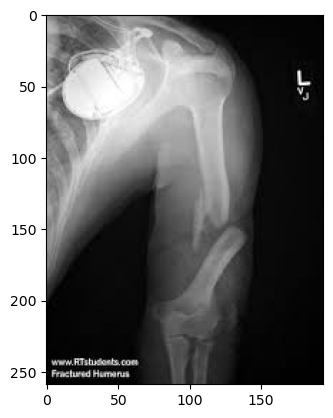

In [58]:
image = cv2.imread(r"C:\Users\admin\Downloads\fracture9.jpg")
plt.imshow(image)

In [59]:
image=load_img(r"C:\Users\admin\Downloads\fracture9.jpg",target_size=(100,100))
image=img_to_array(image) 
image=image/255.0
prediction_image= np.expand_dims(image, axis=0)

In [60]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
print(prediction)
predicted=category[value]
print(predicted)
if predicted=='Non_fractured':
    output='The bone is not fractured'
else:
    output='The bone is fractured'
print("Prediction is- {}.".format(output))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1.0000000e+00 4.2960296e-15]]
Fractured
Prediction is- The bone is fractured.


# Test Image 2


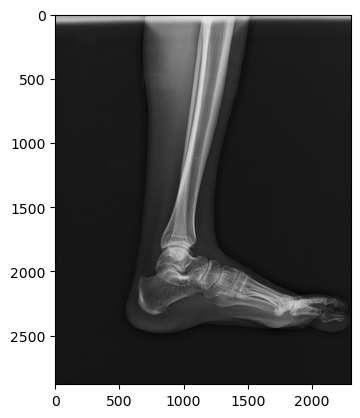

In [42]:
image = cv2.imread(r"C:\Users\admin\Desktop\FracAtlas\images\Non_fractured\IMG0000029.jpg")
plt.imshow(image)


In [75]:
image=load_img(r"C:\Users\admin\Desktop\FracAtlas\images\Non_fractured\IMG0000029.jpg",target_size=(100,100))
image=img_to_array(image) 
image=image/255.0
prediction_image= np.expand_dims(image, axis=0)

In [76]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
print(prediction)
predicted=category[value]
print(predicted)
if predicted=='Non_fractured':
    output='The bone is not fractured'
else:
    output='The bone is fractured'
print("Prediction is- {}.".format(output))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[1.1490074e-06 9.9999881e-01]]
Non_fractured
Prediction is- The bone is not fractured.


In [19]:
model.save("cnn_BoneFractureDetection.h5")